In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [48]:
df=pd.read_csv('Real estate.csv')

In [49]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


<Axes: >

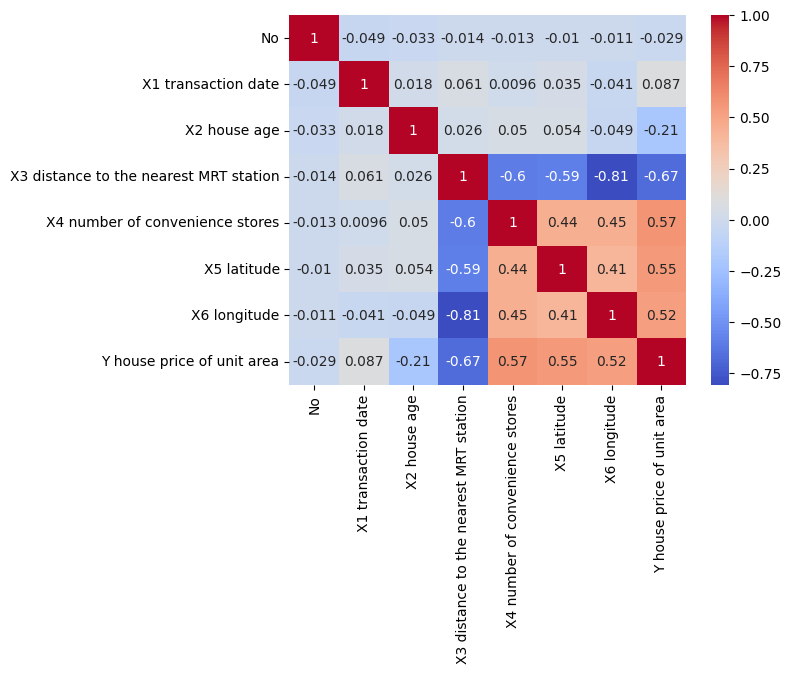

In [51]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

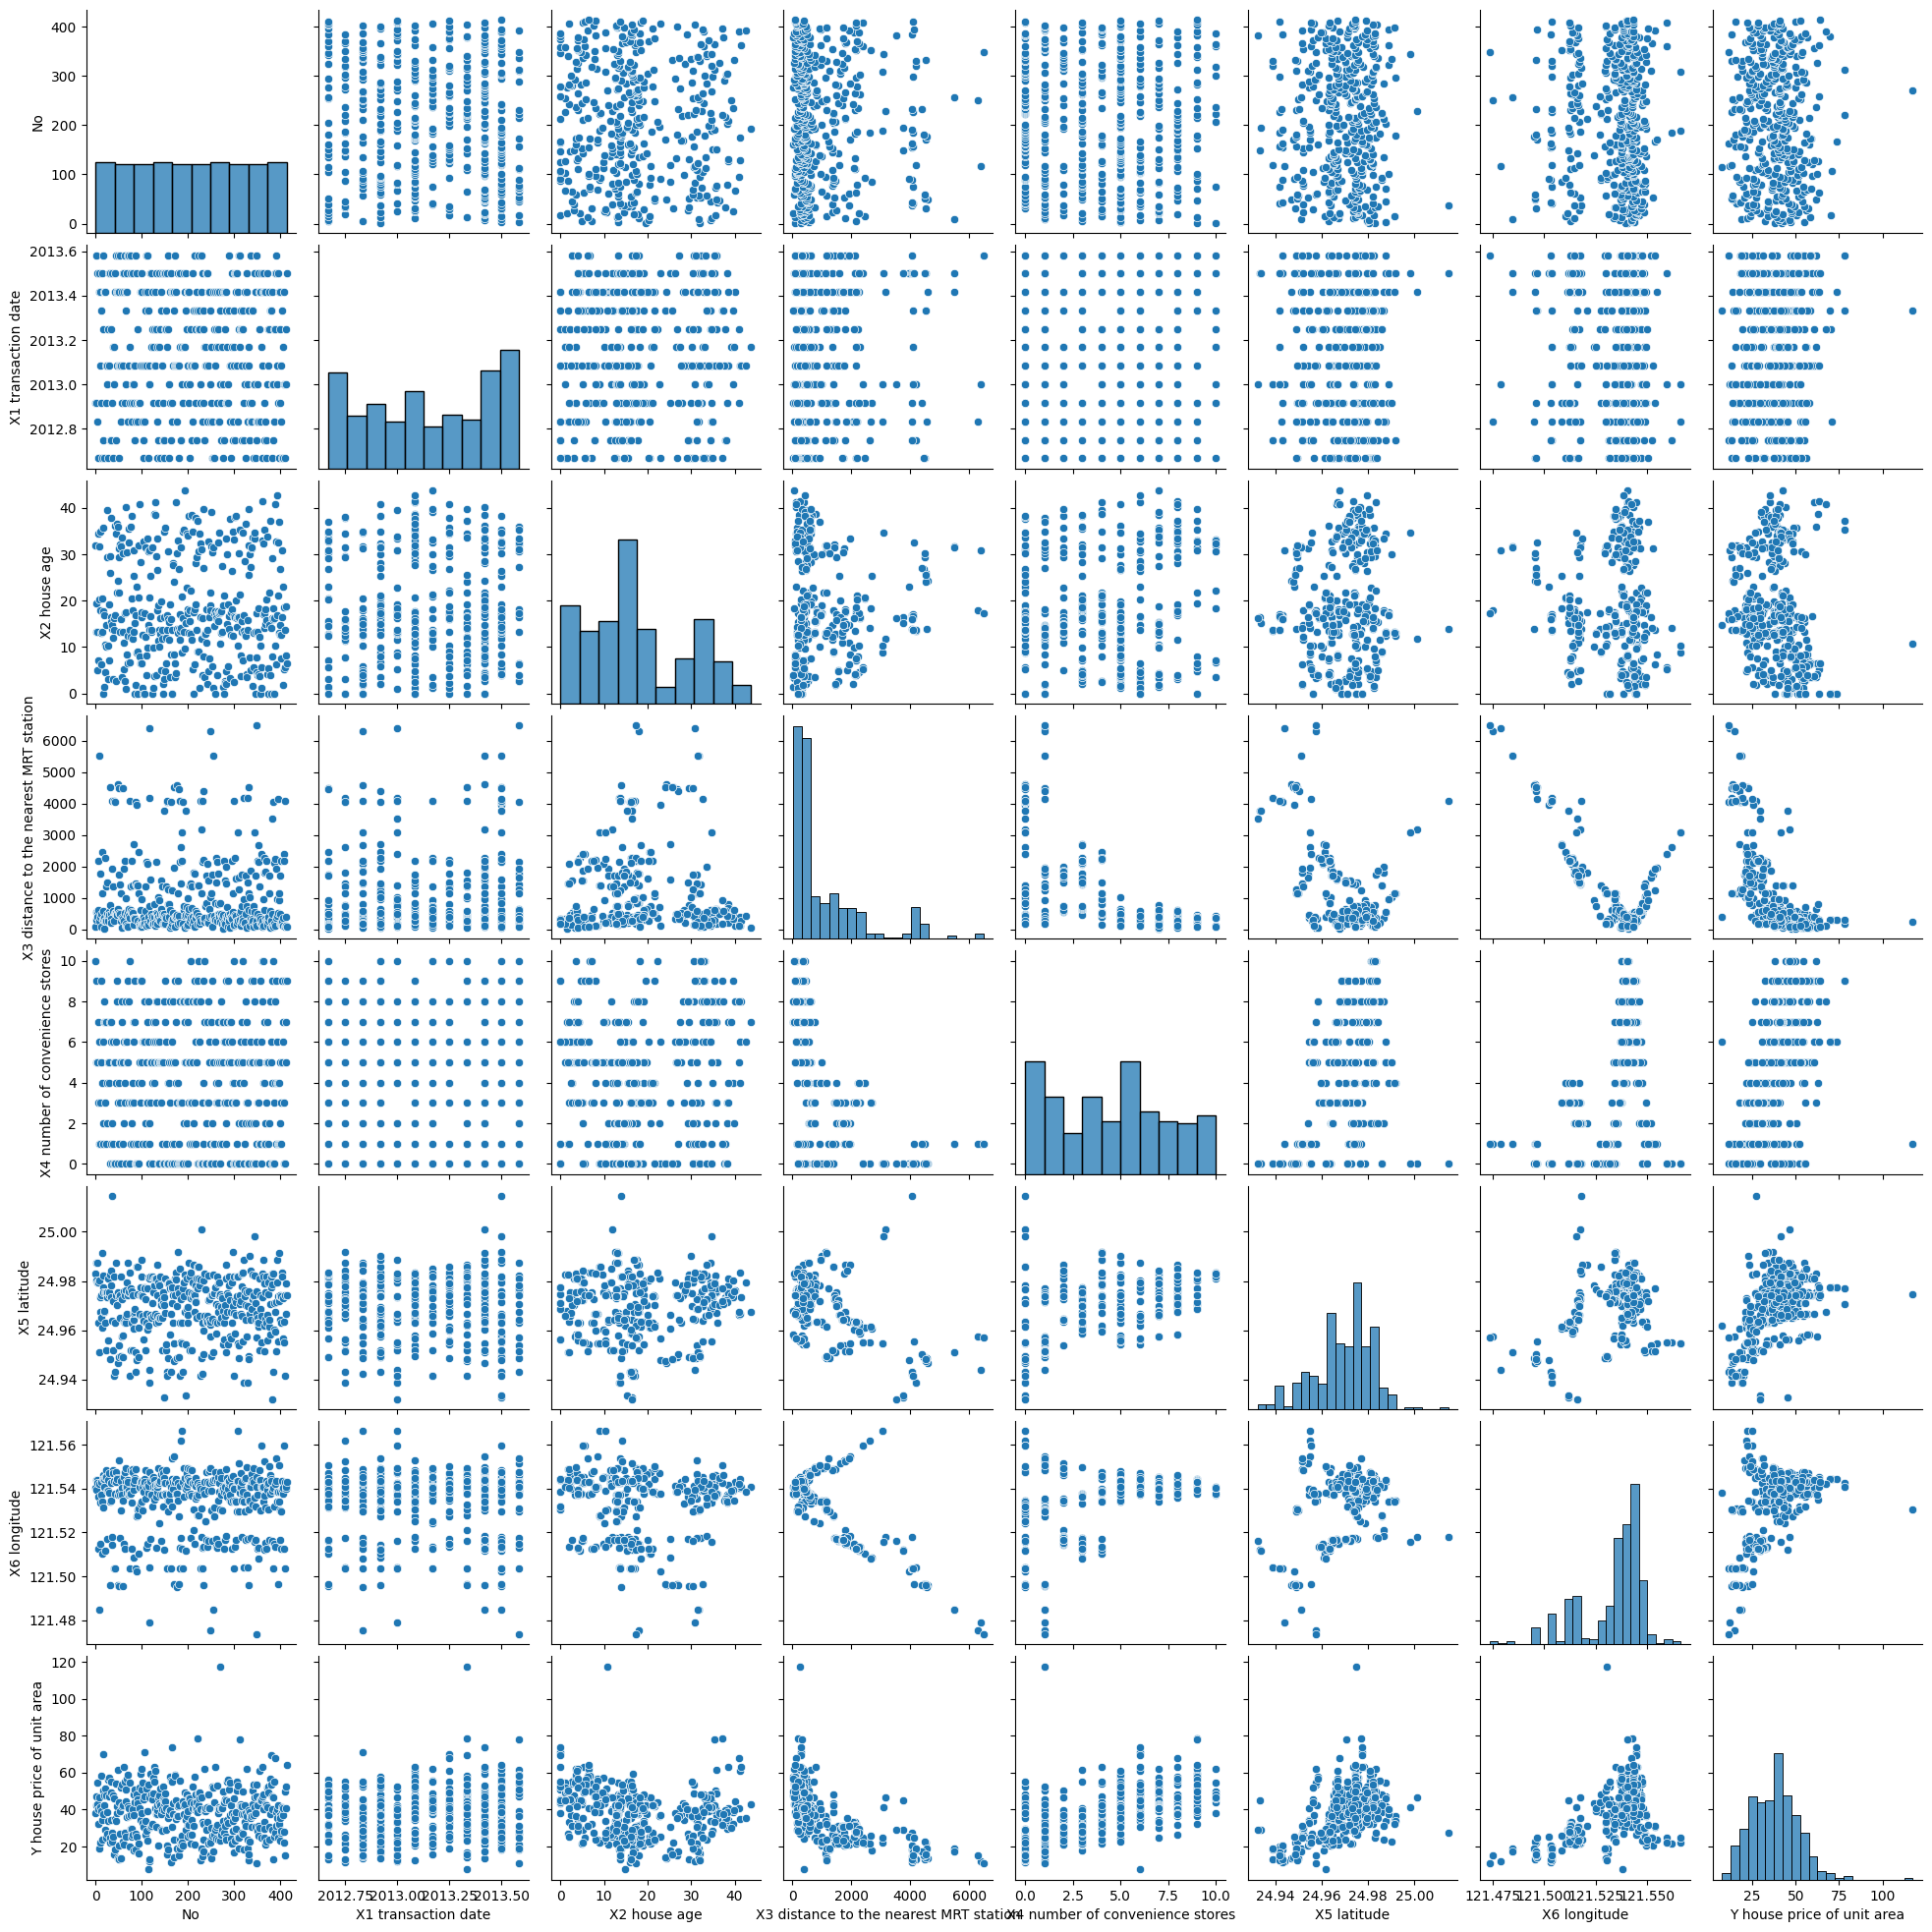

In [52]:
sns.pairplot(df)

In [53]:
x=df.drop('Y house price of unit area', axis=1)
y=df['Y house price of unit area']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)  
x_train_poly= poly.fit_transform(x_train)
x_test_poly= poly.transform(x_test)


In [55]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train_poly, y_train)
y_pred= model.predict(x_test_poly)
 


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 4.696605859616075
Mean Squared Error: 41.466245776238544
Root Mean Squared Error: 6.439428994580074
R^2 Score: 0.7528236234811785


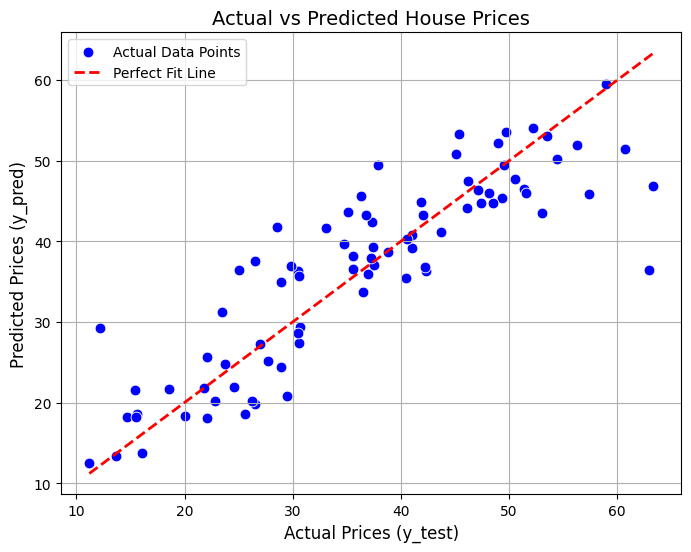

In [61]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60, label='Actual Data Points')
min_val = min(y_test)
max_val = max(y_test)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Fit Line')
plt.xlabel('Actual Prices (y_test)', fontsize=12)
plt.ylabel('Predicted Prices (y_pred)', fontsize=12)
plt.title('Actual vs Predicted House Prices', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error
 
 
y_train_pred = model.predict(x_train_poly)  
 
y_test_pred = model.predict(x_test_poly)    
 
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {rmse_train:.4f}")
print(f"Test (Predicted) RMSE: {rmse_test:.4f}")
 
diff = rmse_test - rmse_train
print(f"Difference: {diff:.4f}")

Training RMSE: 7.5613
Test (Predicted) RMSE: 6.4394
Difference: -1.1219


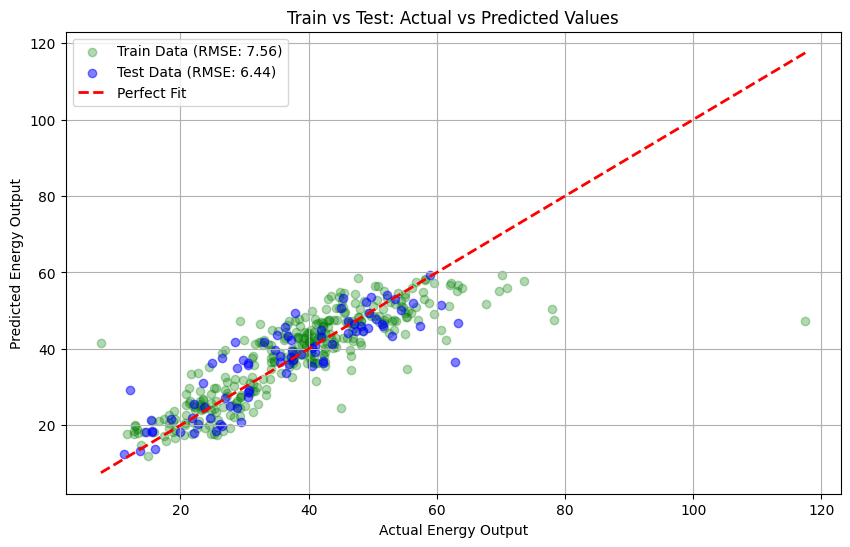

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
 
plt.scatter(y_train, y_train_pred, color='green', alpha=0.3, label=f'Train Data (RMSE: {rmse_train:.2f})')
 
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label=f'Test Data (RMSE: {rmse_test:.2f})')
 
min_val = min(y.min(), y_train.min())
max_val = max(y.max(), y_train.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.title('Train vs Test: Actual vs Predicted Values')
plt.xlabel('Actual Energy Output')
plt.ylabel('Predicted Energy Output')
plt.legend()
plt.grid(True)
plt.show()